In [47]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotnine import *
import gapminder

In [48]:
players = pd.read_csv('player_stats.csv')

duplicate_columns = ['player', 'club', 'position', 'age', 'team', 'birth_year', 'minutes_90s']
players = players[duplicate_columns]

keeper_columns = ['position','team','age','club','birth_year','games','games_starts','minutes','minutes_90s']

player_defense = pd.read_csv('player_defense.csv').drop(duplicate_columns[2:], axis=1)
player_shooting = pd.read_csv('player_shooting.csv').drop(duplicate_columns[2:], axis=1)
player_possession = pd.read_csv('player_possession.csv').drop(duplicate_columns[2:], axis=1)
player_keepers = pd.read_csv('player_keepers.csv').drop(keeper_columns, axis=1)






# merging all of the above dataframes into one
players = players.merge(player_defense, on='player')
players = players.merge(player_shooting, on='player')
players = players.merge(player_possession, on='player')
merged_data = pd.merge(players.loc[players['position'] == 'GK'], player_keepers, on='player', how='left')

#players = players.merge(player_keepers, on='player') -> for some reason everything fucks up with keepers added


players['age'] = players['age'].astype(str).str[:2].astype(int)


#players

In [49]:
player_keepers

,player,goals_against,goals_against_per90,shots_on_target_against,saves,save_pct,wins,ties,losses,clean_sheets,clean_sheets_pct,pens_att,pens_allowed,pens_saved,pens_missed,pens_save_pct
0,Aimen Dahmen,1,0.33,10,9,90.0,1,1,1,2,66.7,0,0,0,0,NaN
1,Alireza Beiranvand,1,0.83,5,4,80.0,0,0,1,0,0.0,0,0,0,0,NaN
2,Alisson,2,0.47,7,5,71.4,2,1,0,2,50.0,0,0,0,0,NaN
3,Andries Noppert,4,0.75,22,18,86.4,3,2,0,2,40.0,1,1,0,0,0.0
4,André Onana,1,1.13,3,2,66.7,0,0,1,0,0.0,0,0,0,0,NaN
5,Danny Ward,5,4.79,9,4,44.4,0,0,1,0,0.0,0,0,0,0,NaN
6,Devis Epassy,3,1.50,12,9,75.0,1,1,0,1,50.0,0,0,0,0,NaN
7,Diogo Costa,6,1.20,17,11,64.7,3,0,2,1,20.0,0,0,0,0,NaN
8,Dominik Livaković,7,0.91,31,24,80.6,2,4,1,2,28.6,1,1,0,0,0.0
9,Ederson,1,1.00,3,2,66.7,0,0,1,0,0.0,0,0,0,0,NaN


In [50]:
player_misc = pd.read_csv('player_misc.csv')
player_misc = player_misc[player_misc.columns.difference(players.columns)]
player_misc.columns

Index(['aerials_lost', 'aerials_won', 'aerials_won_pct', 'ball_recoveries',
       'cards_red', 'cards_yellow', 'cards_yellow_red', 'crosses', 'fouled',
       'fouls', 'offsides', 'own_goals', 'pens_conceded', 'pens_won'],
      dtype='object')

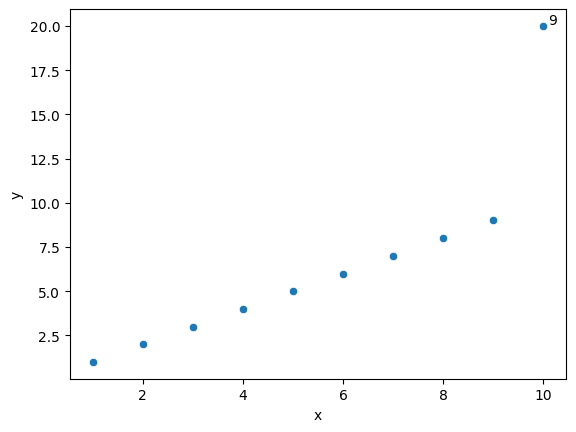

In [51]:
import seaborn as sns
import pandas as pd

# Create a sample data frame
df = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'y': [1, 2, 3, 4, 5, 6, 7, 8, 9, 20]})

# Create the scatter plot using Seaborn
sns.scatterplot(data=df, x='x', y='y')

# Find the outliers
outliers = df[df['y'] > df['y'].quantile(.75) + 1.5 * (df['y'].quantile(.75) - df['y'].quantile(.25))]

# Add labels to the outliers
for i, row in outliers.iterrows():
    plt.annotate(i, xy=(row['x'], row['y']), xytext=(row['x']+0.1, row['y']+0.1))
